### Assignment 2: Python for Analytics, Summer

* covers lectures 4-6
* due: July 27th by 5 pm.
* Points will be deducted if:
    * Problems are not completed.
    * Portions of problems are not completed.
    * Third party modules where used when the question specified not to do so.
    * The problem was solved in a very inefficient manner.  For instance, copying and pasting the same block of code 10 times instead of using a for loop or using a for loop when a comprehension would work.

In [1]:
import numpy as np
import pandas as pd
import sys
import os

#### Question 1 (15 points)

Using the Iris data, sum the 4 numeric  features and find out how many rows have a sum greater than 10.  Do this in two ways.  First using Numpy, then using Pandas.

Print the shape for both the Pandas and Numpy solution.

In [2]:
parent_path = os.path.dirname(os.getcwd())
data_path = parent_path + "/assignment2/iris.csv"

In [3]:
# load the iris dataset using Numpy

iris_array = np.genfromtxt(data_path,
                           delimiter = ',',
                           skip_header = True,
                           usecols = [1,2,3,4])

print(iris_array.shape)
iris_array[0:5, :]

(150, 4)


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [4]:
iris_array.sum(axis = 1) # row-wise sum of iris array
np.count_nonzero(iris_array.sum(axis = 1) > 10) # count of rows where the sum is greater than 10

128

In [5]:
# load the iris dataset as a df using Pandas

iris = pd.read_csv(data_path)
iris = iris.iloc[:, [1,2,3,4]] # just the length and width columns
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
greater_than_10 = iris.sum(axis=1) > 10
greater_than_10.value_counts()

True     128
False     22
dtype: int64

#### Question 2 (10 points)

Consider the below two arrays.  The first will be actual values and the second predicted values.  Calculate the below:

* MAE: Mean Absolute Error, defined as the average absolute error.
* MSE: Mean Squared Error, defined as taking the difference between the two arrays, squaring the errors, summing and finding the mean.
* MAPE: Mean Absolute Percentage Error, defined as the mean percentage difference between the two arrays.

Solve each using one line of code, making use of Numpy array elementwise operations.

Print out each metric.

In [7]:
actual = np.array([1,4,5,2,4,6,1])
predicted = np.array([5,2,3,4,5,6,1])

In [8]:
# Mean Absolute Error

mae = sum(abs(predicted - actual)) / len(actual)
mae

1.5714285714285714

In [9]:
# Mean Squared Error

mse = sum((predicted - actual)**2) / len(actual)
mse

4.142857142857143

In [10]:
# Mean Absolute Percentage Error

mape = sum(abs((actual - predicted) / actual)) / len(actual)
mape

0.8785714285714287

#### Question 3 (10 points)

Using the describe method and loc, find the standard deviation and mean for Sepal Length and Petal Length.  Create a new DataFrame that is subetted to include only rows where the Sepal Length and Petal Length are greater than one standard deviation from the mean.  Find the pairwise correlations for each feature for the subsetted DataFrame and the number of rows left after subsetting.  Do the same process but switch the and to an or when subsetting the DataFrame.

Print the row count and correlation matrix for both the and subsetting and or subsetting.

In [11]:
iris.loc[:, ['SepalLengthCm', 'PetalLengthCm']].describe()

,SepalLengthCm,PetalLengthCm
count,150.000000,150.000000
mean,5.843333,3.758667
std,0.828066,1.764420
min,4.300000,1.000000
25%,5.100000,1.600000
50%,5.800000,4.350000
75%,6.400000,5.100000
max,7.900000,6.900000


In [12]:
sepalLength_std = iris.loc[:, ['SepalLengthCm']].describe().loc['std', :][0]
sepalLength_mean = iris.loc[:, ['SepalLengthCm']].describe().loc['mean', :][0]
sepal_deviation = sepalLength_mean - sepalLength_std

petalLength_std = iris.loc[:, ['PetalLengthCm']].describe().loc['std', :][0]
petalLength_mean = iris.loc[:, ['PetalLengthCm']].describe().loc['mean', :][0]
petal_deviation = petalLength_mean - petalLength_std

print(sepal_deviation)
print(petal_deviation)

5.015267205355472
1.9942462467144075


In [13]:
iris_subset = iris[((iris['SepalLengthCm'] > sepal_deviation) & (iris['PetalLengthCm'] > petal_deviation))]
iris_subset.shape # 96 rows are left

(96, 4)

In [14]:
iris_subset.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,0.485446,0.816113,0.566486
SepalWidthCm,0.485446,1.000000,0.460547,0.528233
PetalLengthCm,0.816113,0.460547,1.000000,0.808063
PetalWidthCm,0.566486,0.528233,0.808063,1.000000


In [15]:
iris_subset_or = iris[((iris['SepalLengthCm'] > sepal_deviation) | (iris['PetalLengthCm'] > petal_deviation))]
iris_subset_or.shape # 122 rows are left

(122, 4)

In [16]:
iris_subset_or.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.041237,0.793487,0.710365
SepalWidthCm,-0.041237,1.000000,-0.446988,-0.360579
PetalLengthCm,0.793487,-0.446988,1.000000,0.942323
PetalWidthCm,0.710365,-0.360579,0.942323,1.000000


#### Question 4 (15 points)

Load Boston Housing dataset from Scikit-Learn.  Put the data into a Pandas DataFrame using the data and feature_names attributes from the boston_data object.  Find the IQR (interquartile range) for AGE, which is defined as the 75th quartile - the 25th quartile.  Remove observations with an AGE that are not within 1.5 IQR of the median.  Find the strongest correlated feature with AGE, not including itself, and plot the two features as a scatter plot.  Note strongest correlated could mean positive or negative.

Print the IQR, the highest correlating feature, the correlation itself and the scatter plot.

In [17]:
from sklearn.datasets import load_boston

In [18]:
boston_data = load_boston()
boston = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [19]:
boston.shape

(506, 13)

In [20]:
boston[['AGE']].quantile(0.5, axis=0)[0] == boston[['AGE']].median()[0]

True

In [21]:
iqr = boston[['AGE']].quantile(0.75, axis=0)[0] - boston[['AGE']].quantile(0.25, axis=0)[0]

upper = boston[['AGE']].median()[0] + 1.5*iqr
lower = boston[['AGE']].median()[0] - 1.5*iqr

print(round(iqr, 3))
print(round(upper, 3))
print(round(lower, 3))

49.05
151.075
3.925


In [22]:
# df[((df["a"] > 6) & (df["b"] > 3))]

boston[((boston['AGE'] > upper) | (boston['AGE'] < lower))]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
41,0.12744,0.0,6.91,0.0,0.448,6.77,2.9,5.7209,3.0,233.0,17.9,385.41,4.84


In [23]:
# there is only one outlier row, which is in index position 41, so we can drop it according to this position
boston_new = boston.drop(boston.index[41])
boston_new.shape # confirm the row was dropped

(505, 13)

In [24]:
boston_new.corr().loc['AGE', :].sort_values()

DIS       -0.748317
ZN        -0.575041
B         -0.273585
RM        -0.238471
CHAS       0.085728
PTRATIO    0.261762
CRIM       0.352826
RAD        0.455260
TAX        0.504915
LSTAT      0.601240
INDUS      0.645664
NOX        0.731783
AGE        1.000000
Name: AGE, dtype: float64

Text(0.5, 1.0, 'Scatterplot of AGE and DIS variables in Boston Housing Data')

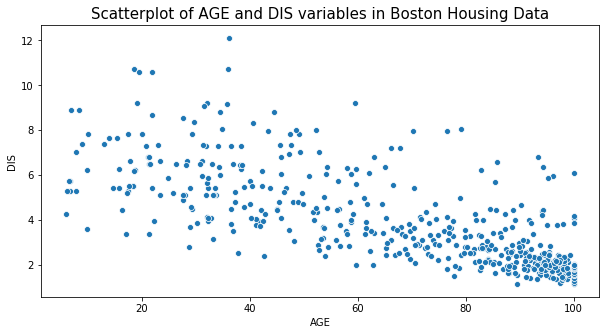

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,5))
ax = sns.scatterplot(x ="AGE", y="DIS", data = boston_new)
ax.set_xlabel("AGE", fontsize = 10)
ax.set_ylabel("DIS", fontsize = 10)
ax.set_title("Scatterplot of AGE and DIS variables in Boston Housing Data", fontsize = 15)

#### Question 5 (10 points)

For rating_df, do the following 3 data transformations to each column:

* min_max: 0-1 scale, defined as (x - min(x))/(max(x) - min(x))
* mean_centered: x - mean(x)
* z_score: (x - mean(x))/std(x)

This means, for instance, each column for min max should be scaled to where the max is 1 and the min is 0.

Hint, this should be done using 1 line, making use of broadcasting and rows and columnwise mean, min, max and standard deviation calculations.

Print out the 3 scaled dataframes.

In [26]:
user_1 = np.array([4,2,5])
user_2 = np.array([1,5,4])
user_3 = np.array([2,4,2])
user_4 = np.array([3,5,4])

rating_matrix = np.array([user_1, user_2, user_3, user_4])

columns = ["star_wars", "harry_potter", "avengers"]
index = ["user_1", "user_2", "user_3", "user_4"]

rating_df = pd.DataFrame(rating_matrix, columns = columns, index = index)

rating_df

,star_wars,harry_potter,avengers
user_1,4,2,5
user_2,1,5,4
user_3,2,4,2
user_4,3,5,4


In [27]:
# min_max: 0-1 scale, defined as (x - min(x))/(max(x) - min(x))

ratings_MinMax = (rating_df - rating_df.min(axis=0)) / (rating_df.max(axis=0) - rating_df.min(axis=0))
ratings_MinMax

,star_wars,harry_potter,avengers
user_1,1.000000,0.000000,1.000000
user_2,0.000000,1.000000,0.666667
user_3,0.333333,0.666667,0.000000
user_4,0.666667,1.000000,0.666667


In [28]:
# mean_centered: x - mean(x)

ratings_Centered = rating_df - rating_df.mean(axis = 0)
ratings_Centered

,star_wars,harry_potter,avengers
user_1,1.5,-2.0,1.25
user_2,-1.5,1.0,0.25
user_3,-0.5,0.0,-1.75
user_4,0.5,1.0,0.25


In [29]:
# z_score: (x - mean(x))/std(x)

ratings_Zscaled = (rating_df - rating_df.mean(axis=0)) / rating_df.std(axis=0)
ratings_Zscaled

,star_wars,harry_potter,avengers
user_1,1.161895,-1.414214,0.993399
user_2,-1.161895,0.707107,0.198680
user_3,-0.387298,0.000000,-1.390759
user_4,0.387298,0.707107,0.198680


#### Question 6 (15 points)

Add a column to rating_df called "most_similar_user" that has the user_id of the most similar user for that given observation.  Define similarity using the euclidean distance between two rating vectors.  Note, when making a distance matrix, the min distance is going to be the distance between each user and themselves.  Make sure the most_similar_user is not the user themself.

For instance, for user_1, the most similar user, not including themself, is user_4.

Print out the dataframe with the new column.

In [30]:
user_1 = np.array([4,2,5])
user_2 = np.array([1,5,4])
user_3 = np.array([2,4,2])
user_4 = np.array([3,5,4])

rating_matrix = np.array([user_1, user_2, user_3, user_4])

columns = ["star_wars", "harry_potter", "avengers"]
index = ["user_1", "user_2", "user_3", "user_4"]

rating_df = pd.DataFrame(rating_matrix, columns = columns, index = index)

rating_df

,star_wars,harry_potter,avengers
user_1,4,2,5
user_2,1,5,4
user_3,2,4,2
user_4,3,5,4


In [31]:
from scipy.spatial.distance import squareform, pdist

distMatrix = pd.DataFrame(squareform(pdist(rating_df)),
                         index = index,
                         columns = index)

distMatrix

,user_1,user_2,user_3,user_4
user_1,0.000000,4.358899,4.123106,3.316625
user_2,4.358899,0.000000,2.449490,2.000000
user_3,4.123106,2.449490,0.000000,2.449490
user_4,3.316625,2.000000,2.449490,0.000000


In [32]:
np.argsort(distMatrix, axis=1)

,user_1,user_2,user_3,user_4
user_1,0,3,2,1
user_2,1,3,2,0
user_3,2,1,3,0
user_4,3,1,2,0


In [33]:
sortedDist = np.argsort(distMatrix, axis=1).applymap(lambda x: index[x])
sortedDist.columns = ['n0', 'n1', 'n2', 'n3']
sortedDist = sortedDist.loc[:, ['n1', 'n2', 'n3']] # remove column n0 since it is each user
sortedDist

,n1,n2,n3
user_1,user_4,user_3,user_2
user_2,user_4,user_3,user_1
user_3,user_2,user_4,user_1
user_4,user_2,user_3,user_1


In [34]:
rating_df['most_similar_user'] = sortedDist['n1']
rating_df

,star_wars,harry_potter,avengers,most_similar_user
user_1,4,2,5,user_4
user_2,1,5,4,user_4
user_3,2,4,2,user_2
user_4,3,5,4,user_2


#### Question 7 (10 points)

Use a for loop to make a 2,3 and 4 period rolling mean column for each user.  Making sure to add each column to the dataframe.

Print the dataframe out.

In [35]:
metric = np.array([5,3,2,4,5,1,4,1,4,2,5,3,1,2,3])
ids = np.array(["a","a","a","a","a","b","b","b","b","b","c","c","c","c","c"])

df = pd.DataFrame({
    "id":ids,
    "metric":metric
})

df

,id,metric
0,a,5
1,a,3
2,a,2
3,a,4
4,a,5
5,b,1
6,b,4
7,b,1
8,b,4
9,b,2


In [36]:
# not sure if this is cleanest/best way to do this. open to alternatives!

for i in range(2, 5):
    means = df.groupby(['id']).metric.rolling(window=i).mean().values
    new_col = 'RollingMean_' + str(i) + 'Period'
    df[new_col] = means

In [37]:
df

,id,metric,RollingMean_2Period,RollingMean_3Period,RollingMean_4Period
0,a,5,NaN,NaN,NaN
1,a,3,4.0,NaN,NaN
2,a,2,2.5,3.333333,NaN
3,a,4,3.0,3.000000,3.50
4,a,5,4.5,3.666667,3.50
5,b,1,NaN,NaN,NaN
6,b,4,2.5,NaN,NaN
7,b,1,2.5,2.000000,NaN
8,b,4,2.5,3.000000,2.50
9,b,2,3.0,2.333333,2.75


#### Question 8 (15 points)

Find pairwise correlations for each ids period of data, meaning for each id a,b,c, treat metric for periods 1-5 as a vector, and find the correlations.  The result should be a 3 x 3 correlation matrix.

Find the highest correlating users (negative or positive) using the correlation matrix.  Create  a dataframe with two columns,  the first being an id (a,b,c) and the second column the highest correlating id.

Print the 3 by 3 correlation matrix and the two column dataframe with the most similar ids.

In [38]:
metric = np.array([5,3,2,4,5,1,4,1,4,2,5,3,1,2,3])
periods = [1,2,3,4,5] * 3
ids = np.array(["a","a","a","a","a","b","b","b","b","b","c","c","c","c","c"])

df = pd.DataFrame({
    "id":ids,
    "metric":metric,
    "period": periods
})

df

,id,metric,period
0,a,5,1
1,a,3,2
2,a,2,3
3,a,4,4
4,a,5,5
5,b,1,1
6,b,4,2
7,b,1,3
8,b,4,4
9,b,2,5


In [39]:
df_pivot = df.pivot(index='period', columns='id', values='metric')
df_pivot

id,a,b,c
period,,,
1,5,1,5
2,3,4,3
3,2,1,1
4,4,4,2
5,5,2,3


In [40]:
corr_matrix = df_pivot.corr()
corr_matrix

id,a,b,c
id,,,
a,1.000000,-0.075858,0.749777
b,-0.075858,1.000000,-0.177822
c,0.749777,-0.177822,1.000000


In [41]:
np.argsort(corr_matrix, axis=1)

id,a,b,c
id,,,
a,1,2,0
b,2,0,1
c,1,0,2


In [42]:
# use the same method we used with the distance matrix in Question 6

index = ['a', 'b', 'c']
sortedCorr = np.argsort(corr_matrix, axis=1).applymap(lambda x: index[x])
sortedCorr.columns = ['corr1', 'corr2', 'corr3'] 
sortedCorr = sortedCorr.loc[:, ['corr1', 'corr2']] # remove column corr3 since it corresponds to each id
sortedCorr

,corr1,corr2
id,,
a,b,c
b,c,a
c,b,a


In [43]:
sortedCorr.corr2.values

array(['c', 'a', 'a'], dtype=object)

In [44]:
new_df = pd.DataFrame({
    'id': np.array(['a', 'b', 'c']),
    'highest_correlating_id': sortedCorr.corr2.values
})

new_df

,id,highest_correlating_id
0,a,c
1,b,a
2,c,a
